Let us see how we can use all available periods, instead of always trying to identify the best period

In [32]:
#Load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
#Read in the data
data = pd.read_csv("..\EURGBP WPR Algorithmic Input Selection.csv")

#Label the data
HORIZON = 10
data['Target'] = data['Close'].shift(-HORIZON) - data['Close']

#Drop the last 10 rows 
data = data.iloc[:-HORIZON,:]

Before we go furhter, we should scale the data

In [34]:
#Define inputs and target
X = data.iloc[:,1:-1].copy() 
y = data.iloc[:,-1].copy()


In [35]:
#Store Z-scores
Z1 = X.mean()
Z2 = X.std()

In [36]:
#Scale the data
X = ((X - Z1)/ Z2)
X

True Open  True High  True Low  True Close      Open      High  \
0     -2.218309  -2.239552 -2.216086   -2.234841 -0.433302 -0.544670   
1     -2.234603  -2.192158 -2.214827   -2.200983 -0.528467 -0.170754   
2     -2.197001  -2.127303 -2.184602   -2.118220 -0.173759  0.347629   
3     -2.119289  -2.108595 -2.110299   -2.110696  0.293417  0.194664   
4     -2.110515  -2.113584 -2.110299   -2.108188  0.111738  0.169169   
...         ...        ...       ...         ...       ...       ...   
6984   0.505360   0.495573  0.530853    0.508023 -1.070911 -0.893091   
6985   0.508368   0.528374  0.528334    0.516550 -0.685058 -0.401052   
6986   0.516766   0.493827  0.525438    0.519685 -0.728315 -0.826806   
6987   0.519899   0.531492  0.538535    0.536739 -0.861547 -0.732478   
6988   0.538951   0.521639  0.564478    0.555800 -0.784549 -0.670441   

           Low     Close     WPR 5    WPR 10  ...  Diff WPR 25  Diff WPR 30  \
0    -0.398915 -0.545858 -1.366202 -1.368921  ...    -1.464764    -1.197796   
1    -0.257373 -0.182452 -0.150485 -0.468037  ...    -0.675924    -0.567114   
2    -0.124678  0.319393  1.415724  1.400463  ...     0.467084     0.606993   
3     0.326486  0.085776  1.211073  1.198665  ...     0.086522     0.154285   
4     0.016864  0.129038  1.249611  1.251517  ...     0.203462     0.246071   
...        ...       ...       ...       ...  ...          ...          ...   
6984 -0.529841 -0.686894 -1.101360 -1.293020  ...    -0.553780    -0.559344   
6985 -0.686422 -0.627191 -0.626674 -1.137142  ...    -0.505356    -0.508716   
6986 -0.799655 -0.861675 -0.454624 -1.079834  ...    -0.806167    -0.707558   
6987 -0.820886 -0.797646  0.246288 -0.669683  ...    -1.209475    -0.679495   
6988 -0.266220 -0.204084  1.203195  0.041174  ...    -0.960474    -0.174360   

      Diff WPR 35  Diff WPR 40  Diff WPR 45  Diff WPR 50  Diff WPR 55  \
0       -1.145008    -1.203435    -1.161128    -1.209845    -1.266032   
1       -0.385788    -0.405452    -0.347915    -0.360505    -0.399963   
2        0.696642     0.717337     0.767937     0.802471     0.805491   
3        0.197474     0.221277     0.246421     0.261086     0.256420   
4        0.296150     0.315395     0.329438     0.361342     0.368728   
...           ...          ...          ...          ...          ...   
6984    -0.591176    -0.810848    -0.861134    -0.594213    -0.592935   
6985    -0.537663    -0.739527    -0.802500    -0.564943    -0.539286   
6986    -0.747837    -0.828595    -0.996088    -0.953691    -0.749996   
6987    -0.690446    -0.725665    -0.925279    -0.958419    -0.692459   
6988    -0.158418    -0.166473    -0.392739    -0.422923    -0.177441   

      Diff WPR 60  Diff WPR 65  Diff WPR 70  
0       -1.300386    -1.317261    -1.356168  
1       -0.415427    -0.394925    -0.406590  
2        0.836679     0.878777     0.904734  
3        0.266358     0.285847     0.294290  
4        0.373037     0.389542     0.407335  
...           ...          ...          ...  
6984    -0.615868    -0.637985    -0.656829  
6985    -0.560143    -0.580258    -0.597397  
6986    -0.779008    -0.806984    -0.830820  
6987    -0.719244    -0.745073    -0.767081  
6988    -0.165216    -0.171147    -0.176202  

[6989 rows x 36 columns]

Let's get ready to start measuring accuracy

In [7]:
from sklearn.model_selection import cross_val_score,TimeSeriesSplit
from sklearn.linear_model import Ridge

In [8]:
tscv = TimeSeriesSplit(n_splits=5,gap=HORIZON)

In [9]:
#Return our cross validated accuracy
def score(f_model,f_X,f_y):
    return(np.mean(np.abs(cross_val_score(f_model,f_X,f_y,scoring='neg_mean_squared_error',cv=tscv,n_jobs=-1))))

In [10]:
def get_model():
    return(Ridge())

In [11]:
X['Null'] = 0

In [12]:
#This will be the last entry in our list of results
#Record our error if we always predict the average market return (total sum of squares/TSS)
tss = score(get_model(),X[['Null']],y)
tss

0.00032439931180771236

In [13]:
res = []

In [14]:
#This will be our first entry in our list of results 
#Record our error using OHLC price data
res.append(score(get_model(),X.iloc[:,:8],y))

In [15]:
#Second
#Record our error using just indicators
res.append(score(get_model(),X.iloc[:,8:-1],y))

In [16]:
#Third
#Record our error using all the data we have
res.append(score(get_model(),X.iloc[:,:-1],y))

Let us search for a more meaningfull way of representing all the information we have available so we do not drop anything

In [17]:
import umap

In [117]:
EPOCHS = X.iloc[:,:-1].shape[1] - 2

In [ ]:
for i in range(EPOCHS):
    reducer = umap.UMAP(n_components=(i+1),metric='euclidean',random_state=0,transform_seed=0,n_neighbors=30)
    X_embedded = pd.DataFrame(reducer.fit_transform(X.iloc[:,:-1]))
    res.append(score(get_model(),X_embedded,y))

In [120]:
res.append(tss)

Text(0, 0.5, 'Percentage of TSS')

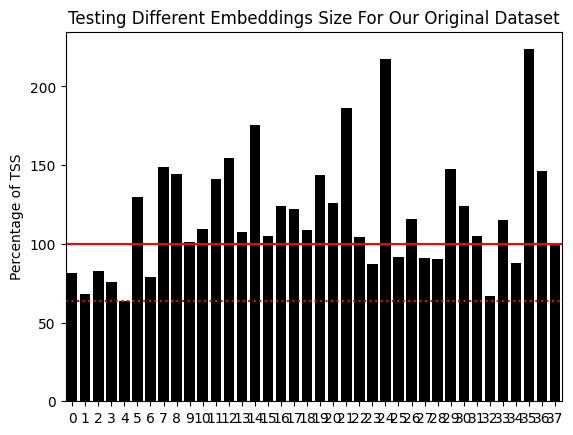

In [149]:
sns.barplot((res/res[-1])*100,color='black')
plt.axhline(np.min(res/res[-1])*100,color='red',linestyle=':')
plt.axhline(100,color='red')


plt.title('Testing Different Embeddings Size For Our Original Dataset')
plt.ylabel('Percentage of TSS')

In [ ]:
reducer = umap.UMAP(n_components=2,metric='euclidean',random_state=0,transform_seed=0,n_neighbors=30)
X_embedded = pd.DataFrame(reducer.fit_transform(X.iloc[:,:-1]))

c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [19]:
data['Class'] = 0

data.loc[data['Target'] > 0,'Class'] = 1

In [ ]:
umap_data =pd.DataFrame(columns=['UMAP 1','UMAP 2'])

In [21]:
data

Time  True Open  True High  True Low  True Close  \
0     2002.11.24 00:00:00    0.63180    0.63190   0.63030     0.63060   
1     2002.11.25 00:00:00    0.63050    0.63570   0.63040     0.63330   
2     2002.11.26 00:00:00    0.63350    0.64090   0.63280     0.63990   
3     2002.11.27 00:00:00    0.63970    0.64240   0.63870     0.64050   
4     2002.11.28 00:00:00    0.64040    0.64200   0.63870     0.64070   
...                   ...        ...        ...       ...         ...   
6984  2025.04.29 00:00:00    0.84910    0.85120   0.84842     0.84933   
6985  2025.04.30 00:00:00    0.84934    0.85383   0.84822     0.85001   
6986  2025.05.01 00:00:00    0.85001    0.85106   0.84799     0.85026   
6987  2025.05.02 00:00:00    0.85026    0.85408   0.84903     0.85162   
6988  2025.05.04 00:00:00    0.85178    0.85329   0.85109     0.85314   

         Open     High      Low    Close      WPR 5  ...  Diff WPR 35  \
0    -0.00470 -0.00610 -0.00420 -0.00600 -92.134831  ...   -34.928215   
1    -0.00580 -0.00170 -0.00260 -0.00180 -55.844156  ...   -11.779900   
2    -0.00170  0.00440 -0.00110  0.00400  -9.090909  ...    21.222978   
3     0.00370  0.00260  0.00400  0.00130 -15.200000  ...     6.003539   
4     0.00160  0.00230  0.00050  0.00180 -14.049587  ...     9.012143   
...       ...      ...      ...      ...        ...  ...          ...   
6984 -0.01207 -0.01020 -0.00568 -0.00763 -84.228972  ...   -18.042090   
6985 -0.00761 -0.00441 -0.00745 -0.00694 -70.058997  ...   -16.410499   
6986 -0.00811 -0.00942 -0.00873 -0.00965 -64.923077  ...   -22.818633   
6987 -0.00965 -0.00831 -0.00897 -0.00891 -44.000000  ...   -21.068811   
6988 -0.00876 -0.00758 -0.00270 -0.00205 -15.435140  ...    -4.847482   

      Diff WPR 40  Diff WPR 45  Diff WPR 50  Diff WPR 55  Diff WPR 60  \
0      -34.928215   -32.258065   -32.450693   -32.829834   -32.464703   
1      -11.779900    -9.677419    -9.677419   -10.377197   -10.377197   
2       20.790533    21.306685    21.505376    20.873869    20.873869   
3        6.400553     6.825619     6.989247     6.639358     6.639358   
4        9.130774     9.130774     9.677419     9.550917     9.301929   
...           ...          ...          ...          ...          ...   
6984   -23.539842   -23.928077   -15.943791   -15.379964   -15.379964   
6985   -21.470943   -22.299974   -15.158992   -13.989115   -13.989115   
6986   -24.054653   -27.675357   -25.582470   -19.451723   -19.451723   
6987   -21.068811   -25.709215   -25.709215   -17.960089   -17.960089   
6988    -4.847482   -10.922057   -11.351026    -4.608378    -4.132231   

      Diff WPR 65  Diff WPR 70   Target  Class  
0      -31.746032   -31.746032  0.01630      1  
1       -9.523810    -9.523810  0.00890      1  
2       21.164021    21.164021 -0.00440      0  
3        6.878307     6.878307 -0.00040      0  
4        9.376680     9.523810 -0.00210      0  
...           ...          ...      ...    ...  
6984   -15.379964   -15.379964  0.00344      1  
6985   -13.989115   -13.989115 -0.00109      0  
6986   -19.451723   -19.451723  0.00021      1  
6987   -17.960089   -17.960089  0.00030      1  
6988    -4.132231    -4.132231 -0.00981      0  

[6989 rows x 39 columns]

In [22]:
umap_data['UMAP 1'] = X_embedded.iloc[:,0]
umap_data['UMAP 2'] = X_embedded.iloc[:,1]

umap_data

UMAP 1    UMAP 2
0     5.235781  0.009182
1     4.230867  0.884829
2     1.765324  3.307827
3     2.623632  3.448573
4     2.507807  3.531500
...        ...       ...
6984  7.631109  8.548650
6985  7.464813  8.570022
6986  7.659719  8.478702
6987  7.580558  8.531121
6988  6.942062  9.981021

[6989 rows x 2 columns]

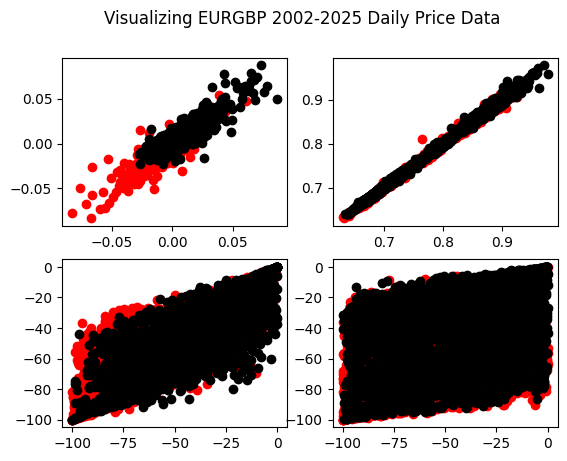

In [225]:
fig , axs = plt.subplots(2,2)

fig.suptitle('Visualizing EURGBP 2002-2025 Daily Price Data')

axs[0,0].scatter(data.loc[data['Target']>0 ,'Open'],data.loc[data['Target']>0 ,'Close'],color='red')
axs[0,0].scatter(data.loc[data['Target']<0 ,'Open'],data.loc[data['Target']<0 ,'Close'],color='black')

axs[0,1].scatter(data.loc[data['Target']>0 ,'True Open'],data.loc[data['Target']>0 ,'True Close'],color='red')
axs[0,1].scatter(data.loc[data['Target']<0 ,'True Open'],data.loc[data['Target']<0 ,'True Close'],color='black')

axs[1,1].scatter(data.loc[data['Target']>0 ,'WPR 5'],data.loc[data['Target']>0 ,'WPR 50'],color='red')
axs[1,1].scatter(data.loc[data['Target']<0 ,'WPR 5'],data.loc[data['Target']<0 ,'WPR 50'],color='black')

axs[1,0].scatter(data.loc[data['Target']>0 ,'WPR 15'],data.loc[data['Target']>0 ,'WPR 25'],color='red')
axs[1,0].scatter(data.loc[data['Target']<0 ,'WPR 15'],data.loc[data['Target']<0 ,'WPR 25'],color='black')


Text(0.5, 1.0, 'Visualizing The Most Effective Embedding We Found')

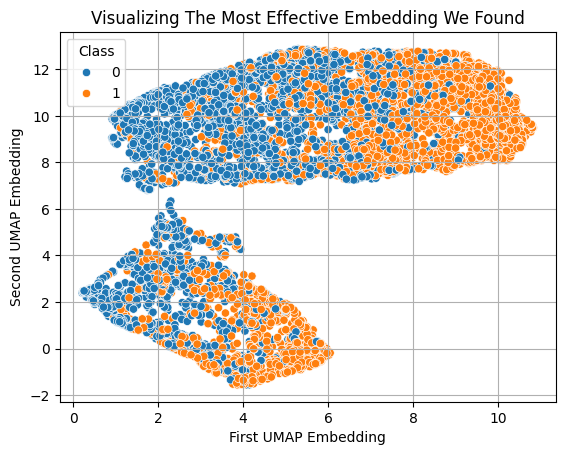

In [216]:
sns.scatterplot(x=X_embedded.iloc[:,0],y=X_embedded.iloc[:,1],hue=data['Class'])
plt.grid()
plt.ylabel('Second UMAP Embedding')
plt.xlabel('First UMAP Embedding')
plt.title('Visualizing The Most Effective Embedding We Found')

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train , test = train_test_split(data,test_size=0.3,shuffle=False)
train

Time  True Open  True High  True Low  True Close  \
0     2002.11.24 00:00:00    0.63180    0.63190   0.63030     0.63060   
1     2002.11.25 00:00:00    0.63050    0.63570   0.63040     0.63330   
2     2002.11.26 00:00:00    0.63350    0.64090   0.63280     0.63990   
3     2002.11.27 00:00:00    0.63970    0.64240   0.63870     0.64050   
4     2002.11.28 00:00:00    0.64040    0.64200   0.63870     0.64070   
...                   ...        ...        ...       ...         ...   
4887  2018.08.07 00:00:00    0.89276    0.89656   0.89234     0.89618   
4888  2018.08.08 00:00:00    0.89618    0.90165   0.89609     0.90120   
4889  2018.08.09 00:00:00    0.90120    0.90300   0.89802     0.89859   
4890  2018.08.10 00:00:00    0.89859    0.89916   0.89255     0.89359   
4891  2018.08.12 00:00:00    0.89202    0.89291   0.89187     0.89271   

         Open     High      Low    Close      WPR 5  ...  Diff WPR 35  \
0    -0.00470 -0.00610 -0.00420 -0.00600 -92.134831  ...   -34.928215   
1    -0.00580 -0.00170 -0.00260 -0.00180 -55.844156  ...   -11.779900   
2    -0.00170  0.00440 -0.00110  0.00400  -9.090909  ...    21.222978   
3     0.00370  0.00260  0.00400  0.00130 -15.200000  ...     6.003539   
4     0.00160  0.00230  0.00050  0.00180 -14.049587  ...     9.012143   
...       ...      ...      ...      ...        ...  ...          ...   
4887  0.00362  0.00703  0.00589  0.00807  -3.420342  ...    30.684081   
4888  0.00807  0.01176  0.00876  0.01171  -3.328402  ...    24.964396   
4889  0.01272  0.01317  0.01049  0.00926 -29.657028  ...     8.651944   
4890  0.00926  0.00733  0.00451  0.00237 -66.975089  ...   -21.087049   
4891  0.00080 -0.00064  0.00142  0.00182 -92.452830  ...   -23.473497   

      Diff WPR 40  Diff WPR 45  Diff WPR 50  Diff WPR 55  Diff WPR 60  \
0      -34.928215   -32.258065   -32.450693   -32.829834   -32.464703   
1      -11.779900    -9.677419    -9.677419   -10.377197   -10.377197   
2       20.790533    21.306685    21.505376    20.873869    20.873869   
3        6.400553     6.825619     6.989247     6.639358     6.639358   
4        9.130774     9.130774     9.677419     9.550917     9.301929   
...           ...          ...          ...          ...          ...   
4887    30.170151    30.364981    27.955782    27.933125    28.047561   
4888    24.289830    24.653149    24.691394    22.658402    22.658402   
4889     9.181369    12.400048    12.742769    10.658064    10.658064   
4890   -21.342247   -11.870491   -11.139197   -12.613036   -12.613036   
4891   -23.739787   -13.382256   -12.582573   -14.163071   -14.163071   

      Diff WPR 65  Diff WPR 70   Target  Class  
0      -31.746032   -31.746032  0.01630      1  
1       -9.523810    -9.523810  0.00890      1  
2       21.164021    21.164021 -0.00440      0  
3        6.878307     6.878307 -0.00040      0  
4        9.376680     9.523810 -0.00210      0  
...           ...          ...      ...    ...  
4887    28.048619    28.048619 -0.00701      0  
4888    22.753767    22.753767 -0.01528      0  
4889    11.515943    11.515943 -0.01118      0  
4890   -10.782504   -10.782504  0.00194      1  
4891   -12.161352   -12.161352  0.00628      1  

[4892 rows x 39 columns]

Our Training Samples End In August 2018

So Our Back Test Period Will Start September 2018

In [29]:
from sklearn.neural_network import MLPRegressor

In [38]:
#Sample mean
Z1 = train.iloc[:,1:-2].mean()

#Sample standard deviation
Z2 = train.iloc[:,1:-2].std()

train_scaled = train.copy()

train_scaled.iloc[:,1:-2] = ((train.iloc[:,1:-2] - Z1) / Z2)

train_scaled

Time  True Open  True High  True Low  True Close  \
0     2002.11.24 00:00:00  -1.838649  -1.857829 -1.837584   -1.854680   
1     2002.11.25 00:00:00  -1.854322  -1.812342 -1.836371   -1.822109   
2     2002.11.26 00:00:00  -1.818155  -1.750097 -1.807244   -1.742490   
3     2002.11.27 00:00:00  -1.743408  -1.732141 -1.735640   -1.735252   
4     2002.11.28 00:00:00  -1.734969  -1.736929 -1.735640   -1.732839   
...                   ...        ...        ...       ...         ...   
4887  2018.08.07 00:00:00   1.307442   1.310211  1.342585    1.349131   
4888  2018.08.08 00:00:00   1.348673   1.371140  1.388096    1.409690   
4889  2018.08.09 00:00:00   1.409193   1.387300  1.411518    1.378204   
4890  2018.08.10 00:00:00   1.377728   1.341334  1.345133    1.317887   
4891  2018.08.12 00:00:00   1.298521   1.266520  1.336881    1.307271   

          Open      High       Low     Close     WPR 5  ...  Diff WPR 35  \
0    -0.428204 -0.539226 -0.392242 -0.535775 -1.373104  ...    -1.151151   
1    -0.518372 -0.181154 -0.259430 -0.190945 -0.166399  ...    -0.388810   
2    -0.182293  0.315264 -0.134919  0.285250  1.388196  ...     0.698070   
3     0.260347  0.168780  0.288419  0.063573  1.185063  ...     0.196850   
4     0.088209  0.144366 -0.002107  0.104624  1.223315  ...     0.295932   
...        ...       ...       ...       ...       ...  ...          ...   
4887  0.253790  0.529294  0.445303  0.619407  1.576749  ...     1.009651   
4888  0.618558  0.914221  0.683535  0.918260  1.579806  ...     0.821285   
4889  0.999721  1.028967  0.827137  0.717109  0.704351  ...     0.284069   
4890  0.716103  0.553708  0.330753  0.151423 -0.536515  ...    -0.695321   
4891  0.022633 -0.094891  0.074260  0.106266 -1.383677  ...    -0.773914   

      Diff WPR 40  Diff WPR 45  Diff WPR 50  Diff WPR 55  Diff WPR 60  \
0       -1.216209    -1.179681    -1.231317    -1.290853    -1.334014   
1       -0.410946    -0.354881    -0.368228    -0.409062    -0.427512   
2        0.722084     0.776872     0.813576     0.818273     0.855076   
3        0.221499     0.247924     0.263426     0.259236     0.270872   
4        0.316475     0.332124     0.365306     0.373583     0.380147   
...           ...          ...          ...          ...          ...   
4887     1.048374     1.107743     1.058042     1.095514     1.149494   
4888     0.843814     0.899108     0.934324     0.888358     0.928316   
4889     0.318235     0.451540     0.481480     0.417064     0.435805   
4890    -0.743593    -0.434987    -0.423628    -0.496871    -0.519274   
4891    -0.826996    -0.490207    -0.478331    -0.557746    -0.582889   

      Diff WPR 65  Diff WPR 70   Target  Class  
0       -1.358483    -1.404393  0.01630      1  
1       -0.408749    -0.422562  0.00890      1  
2        0.902789     0.933299 -0.00440      0  
3        0.292246     0.302122 -0.00040      0  
4        0.399021     0.419007 -0.00210      0  
...           ...          ...      ...    ...  
4887     1.197023     1.237477 -0.00701      0  
4888     0.970732     1.003537 -0.01528      0  
4889     0.490449     0.507024 -0.01118      0  
4890    -0.462543    -0.478174  0.00194      1  
4891    -0.521472    -0.539095  0.00628      1  

[4892 rows x 39 columns]

In [40]:
reducer = umap.UMAP(n_components=2,metric='euclidean',random_state=0,transform_seed=0,n_neighbors=30)
X_embedded = pd.DataFrame(reducer.fit_transform(train_scaled.iloc[:,1:-2],columns=['UMAP 1','UMAP 2']))

c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


First We Need To Train A Model That Estimates The UMAP Embeddings

In [ ]:
#Learn To Estimate UMAP Embeddings From The Data
umap_model = MLPRegressor(shuffle=False,hidden_layer_sizes=(train.iloc[:,1:-2].shape[1],10,20,100,20,10,2),random_state=0,solver='lbfgs',activation='relu',learning_rate='constant',learning_rate_init=1e-4,power_t=1e-1)
np.mean(np.abs(cross_val_score(umap_model,train.iloc[:,1:-2],X_embedded,scoring='neg_mean_squared_error',n_jobs=-1)))

11.713692643382203

In [ ]:
umap_model.fit(train.iloc[:,1:-2],X_embedded)
predictions = umap_model.predict(train.iloc[:,1:-2])

c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [111]:
EPOCHS = 100
res = []

for i in range(EPOCHS):
    #Try different random states
    model = MLPRegressor(shuffle=False,early_stopping=False,hidden_layer_sizes=(2,1,10,20,1),activation='identity',solver='lbfgs',random_state=i,max_iter=int(2e5))
    res.append(score(model,predictions,train['Target']))

Text(0.5, 1.0, 'Our Neural Network Performance With Different Initial Conditions')

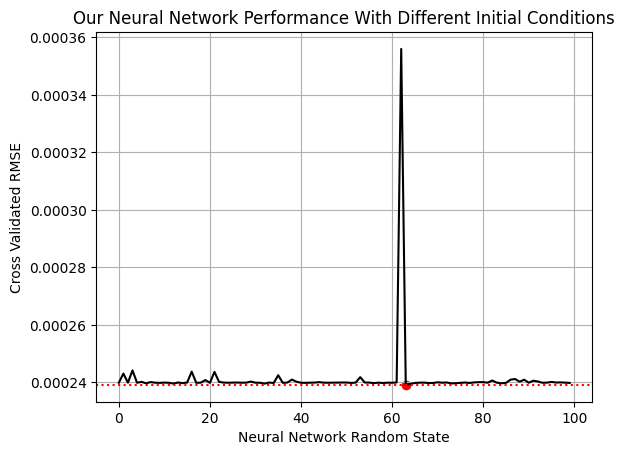

In [112]:
plt.plot(res,color='black')
plt.axhline(np.min(res),color='red',linestyle=':')
plt.scatter(res.index(np.min(res)),np.min(res),color='red')
plt.grid()
plt.ylabel('Cross Validated RMSE')
plt.xlabel('Neural Network Random State')
plt.title('Our Neural Network Performance With Different Initial Conditions')

In [113]:
tss = score(Ridge(),train[['Close']]*0,train['Target'])
1-(np.min(res)/tss)

0.3294833480196916

In [114]:
res.index(np.min(res))

63

In [115]:
embedded_model = MLPRegressor(shuffle=False,early_stopping=False,hidden_layer_sizes=(2,1,10,20,1),activation='identity',solver='lbfgs',random_state=res.index(np.min(res)),max_iter=int(2e5))
embedded_model.fit(predictions,train['Target'])

MLPRegressor(activation='identity', hidden_layer_sizes=(2, 1, 10, 20, 1),
             max_iter=200000, random_state=63, shuffle=False, solver='lbfgs')

In [116]:
import onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

In [123]:
umap_model_input_shape = [("float_input",FloatTensorType([1,train.iloc[:,1:-2].shape[1]]))]
umap_model_output_shape = [("float_output",FloatTensorType([X_embedded.iloc[:,:].shape[1],1]))]

embedded_model_input_shape = [("float_input",FloatTensorType([1,X_embedded.iloc[:,:].shape[1]]))]
embedded_model_output_shape = [("float_output",FloatTensorType([1,1]))]

In [124]:
umap_proto = convert_sklearn(umap_model,initial_types=umap_model_input_shape,final_types=umap_model_output_shape,target_opset=12)
embeded_proto = convert_sklearn(embedded_model,initial_types=embedded_model_input_shape,final_types=embedded_model_output_shape,target_opset=12)

In [125]:
onnx.save(umap_proto,"EURGBP WPR UMAP.onnx")
onnx.save(embeded_proto,"EURGBP WPR EMBEDDED.onnx")